# Doc To Vec To K-Means

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Combining all the spam and Non spam into single dataframe

In [ ]:
import pickle
import pandas as pd
import numpy
import re
import os
import glob
import numpy as np
import gensim
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from gensim.models import Doc2Vec

In [ ]:
spam_path = "/content/drive/MyDrive/Projects/Thuiraj/clean_spam/"

files = os.path.join("/content/drive/MyDrive/Projects/Thuiraj/clean_spam/", "*.csv")

files = glob.glob(files)


df_spam = pd.concat(map(pd.read_csv, files), ignore_index=True)




In [ ]:
# type(df_spam)

labels_spam = []

for i in range(len(df_spam.index)):
  labels_spam.append(0)

# labels_spam = pd.Series(labels_spam)
# labels_spam

In [ ]:
# len(df_spam.index)
df_spam = df_spam.assign(labels=labels_spam)

# df_spam['0']



In [ ]:
df_spam

,Unnamed: 0,0,labels
0,0,Your social security number has been suspended...,0
1,1,"Hello, is this Bob Smith?",0
2,2,Hi. I’m a representative of the Social Securit...,0
3,3,"Hello Mr/Mrs. X, my name is Y and I work with ...",0
4,4,I'm speaking from the Department of Homeland S...,0
...,...,...,...
195,70,I can give you all the information that you ne...,0
196,71,"The truth, Mrs. Johnson, is that CDs are for s...",0
197,72,Is Our information very clear? I can say lots ...,0
198,73,Our information is very clear or not. I have p...,0


In [ ]:
non_spam_path = "/content/drive/MyDrive/Projects/Thuiraj/clean_non_spam/"

files = os.path.join("/content/drive/MyDrive/Projects/Thuiraj/clean_non_spam/", "*.csv")

files = glob.glob(files)

df_non_spam = pd.concat(map(pd.read_csv, files), ignore_index=True)


In [ ]:
df_non_spam = df_non_spam[:200]

df_non_spam

,Unnamed: 0,0
0,0,solar
1,1,mm
2,2,
3,3,lipsmack anyway
4,4,xxx
...,...,...
195,195,lipsmack breath
196,196,so I will be picking you up November first
197,197,oh okay xxx
198,198,Three twenty five


In [ ]:

labels_non_spam = []

for i in range(len(df_non_spam.index)):
  labels_non_spam.append(1)


In [ ]:
df_non_spam = df_non_spam.assign(labels=labels_non_spam)


In [ ]:
df_non_spam

,Unnamed: 0,0,labels
0,0,solar,1
1,1,mm,1
2,2,,1
3,3,lipsmack anyway,1
4,4,xxx,1
...,...,...,...
195,195,lipsmack breath,1
196,196,so I will be picking you up November first,1
197,197,oh okay xxx,1
198,198,Three twenty five,1


In [ ]:
final_df = pd.concat([df_spam, df_non_spam], axis=0)

final_df = final_df[['0','labels']]

final_df = final_df.dropna()

In [ ]:
final_df

,0,labels
0,Your social security number has been suspended...,0
1,"Hello, is this Bob Smith?",0
2,Hi. I’m a representative of the Social Securit...,0
3,"Hello Mr/Mrs. X, my name is Y and I work with ...",0
4,I'm speaking from the Department of Homeland S...,0
...,...,...
195,lipsmack breath,1
196,so I will be picking you up November first,1
197,oh okay xxx,1
198,Three twenty five,1


## Doc To Vec

In [ ]:
from sklearn.model_selection import train_test_split

y = final_df.pop('labels')
X = final_df


X_train,X_test,y_train,y_test = train_test_split(X['0'],y,test_size=0.2, random_state=200, shuffle=True)



In [ ]:
final_df.to_csv('final_data.csv')

# Tokenization

In [ ]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import utils
import csv
from tqdm import tqdm
import multiprocessing
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# For Train Documents

In [ ]:
tqdm.pandas(desc="progress-bar")


# Function for tokenizing
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens


# Initializing the variables
train_documents = []
test_documents = []
i = 0


only_words = []
only_tags = []


#Reading the file
for row in X_train:
  only_words.append(tokenize_text(row))

for row in y_train:
  only_tags.append(row)

for i in range(len(only_words)):
  # print(type(y_train[i]))
  train_documents.append(TaggedDocument(words=only_words[i], tags=[only_tags[i]]))
#         print(type(X_train[i]))




In [ ]:
train_documents

[TaggedDocument(words=['please', 'listen', 'closely', 'you', 'are', 'being', 'notified', 'that', 'your', 'bank', 'accounts', 'and', 'tax', 'returns', 'are', 'being', 'suspended', 'to', 'review', 'your', 'rights', 'and', 'to', 'avoid', 'further', 'action', 'please', 'call', 'out', 'fir', 'at', '1844898xxx', 'or', 'press', 'to', 'speak', 'to', 'your', 'case', 'manager', 'immediately'], tags=[0]),
 TaggedDocument(words=['do', 'you', 'want', 'more', 'information', 'about', 'it'], tags=[0]),
 TaggedDocument(words=["'m", 'speaking', 'from', 'the', 'department', 'of', 'homeland', 'security', 'you', 'have', 'received', 'this', 'call', 'because', 'we', 'have', 'found', 'suspicious', 'activity', 'related', 'to', 'your', 'social', 'security', 'number', 'and', 'we', 'have', 'temporarily', 'suspended', 'your', 'account', 'the', 'moment', 'you', 'get', 'this', 'call', 'kindly', 'reach', 'back', 'to', 'me', 'on', '1-888-952-5554', 'repeat', '1-888-952-5554', 'when', 'you', 'do', 'call', 'us', 'provid

# For Test Documents

In [ ]:
tqdm.pandas(desc="progress-bar")


# Function for tokenizing
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if len(word) < 2:
                continue
            tokens.append(word.lower())
    return tokens


# Initializing the variables
# train_documents = []
# test_documents = []
i = 0


only_words = []
only_tags = []


#Reading the file
for row in X_test:
  only_words.append(tokenize_text(row))

for row in y_test:
  only_tags.append(row)

for i in range(len(only_words)):
  # print(type(y_train[i]))
  test_documents.append(TaggedDocument(words=only_words[i], tags=[only_tags[i]]))
#         print(type(X_train[i]))




In [ ]:
cores = multiprocessing.cpu_count()

model_dbow = Doc2Vec(dm=1, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores, alpha=0.025, min_alpha=0.001)
model_dbow.build_vocab([x for x in tqdm(train_documents)])
train_documents  = utils.shuffle(train_documents)
model_dbow.train(train_documents,total_examples=len(train_documents), epochs=30)

def vector_for_learning(model, input_docs):
    sents = input_docs
    targets, feature_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in sents])
    return targets, feature_vectors
model_dbow.save('./movieModel.d2v')

100%|██████████| 320/320 [00:00<00:00, 925639.50it/s]


## Logistic Regression Classification 

In [ ]:
y_train, X_train = vector_for_learning(model_dbow, train_documents)
y_test, X_test = vector_for_learning(model_dbow, test_documents)

logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Testing accuracy for movie plots%s' % accuracy_score(y_test, y_pred))
print('Testing F1 score for movie plots: {}'.format(f1_score(y_test, y_pred, average='weighted')))

Testing accuracy for movie plots0.975
Testing F1 score for movie plots: 0.9750313283208021


## K-Means Clustering

In [ ]:
final_X_train = pd.DataFrame(X_train)

In [ ]:
final_X_test = pd.DataFrame(X_test)

In [ ]:
final_y_test = pd.DataFrame(y_test)

In [ ]:
final_X_train

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.111277,0.105864,-0.131382,-0.199973,-0.314779,-0.176930,-0.084133,0.258797,-0.032425,-0.193017,...,0.257289,-0.053973,0.269171,0.433180,-0.297129,0.037713,0.035855,0.323519,0.161964,-0.250402
1,-0.075171,-0.053284,-0.047665,-0.022881,-0.174206,0.020363,0.060227,-0.000884,-0.058780,-0.032704,...,0.070626,-0.075535,0.070285,0.098248,-0.024675,0.139138,-0.034503,0.183583,0.013319,0.024569
2,0.050291,0.055547,-0.092771,-0.076620,-0.107055,-0.117452,-0.141250,0.081493,-0.042410,0.049070,...,0.111044,-0.036200,0.066220,0.163775,-0.056161,0.114320,0.118120,0.298249,0.069318,-0.060859
3,-0.050628,0.038444,-0.124422,-0.111613,-0.126627,-0.059453,-0.030091,0.150151,-0.087743,-0.061408,...,0.046113,-0.092986,0.192955,0.118367,-0.090955,0.106490,0.024207,0.252750,0.079764,-0.042987
4,0.027754,0.108625,-0.065516,-0.016023,0.061846,-0.120097,-0.092010,0.093732,-0.030718,0.035765,...,0.086764,-0.097972,0.054695,0.120664,0.035137,0.029287,0.130578,0.226143,0.042446,0.005526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.000426,0.016093,-0.009489,-0.007167,-0.015794,-0.018716,-0.011513,0.024969,-0.000204,-0.008936,...,0.015856,-0.024077,0.020734,0.037078,-0.009633,0.005861,0.012386,0.050597,0.014055,-0.007740
316,-0.001047,0.054756,-0.055080,-0.074028,-0.003096,-0.102903,-0.078006,0.104672,-0.011753,0.025836,...,0.086481,-0.060306,0.069611,0.124630,0.022636,-0.030976,0.124794,0.206775,0.015573,-0.057334
317,-0.150771,0.161348,-0.215565,-0.153011,-0.374867,-0.084302,0.168105,0.328341,-0.160751,-0.204793,...,0.259121,-0.290590,0.419307,0.352092,-0.385565,0.263017,0.024955,0.560685,0.175459,0.052910
318,-0.112420,0.114883,-0.242402,-0.195624,-0.387087,-0.168869,-0.033584,0.308306,-0.145549,-0.168156,...,0.162841,-0.267667,0.413159,0.413698,-0.212633,0.287133,0.023822,0.709491,0.189549,-0.082045


In [ ]:
!pip install catboost
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


class clust():
    def _load_data(self, sklearn_load_ds):
        data = sklearn_load_ds
        # X = pd.DataFrame(data.data)
        # X = data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(final_X_train, y_train, test_size=0.2, random_state=42)
        
        
    def __init__(self, sklearn_load_ds):
        self._load_data(sklearn_load_ds)
    
    # Logistic Regression
    def classify_logreg(self, model=LogisticRegression(random_state=42)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nLOGISTIC REGRESSION CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Naive Bayes
    def classify_nb(self, model=GaussianNB()):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nNAIVE BAYES CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # KNN 
    def classify_knn(self, model=KNeighborsClassifier(n_neighbors=5)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nKNN CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Random Forest 
    def classify_rf(self, model=RandomForestClassifier(max_depth=2, random_state=0)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nRANDOM FOREST CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # XG Boost 
    def classify_xg(self, model=XGBClassifier()):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nXG BOOST CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Cat Boost
    def classify_cat(self, model=CatBoostClassifier(verbose=0, n_estimators=100)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nCAT BOOST CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()


    def Kmeans(self, output='add'):
        n_clusters = len(np.unique(self.y_train))
        clf = KMeans(n_clusters = n_clusters, random_state=42)
        clf.fit(self.X_train)
        y_labels_train = clf.labels_
        y_labels_test = clf.predict(self.X_test)

        # print(self.X_train['clust'])

        if output == 'add':
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == 'replace':
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output should be either add or replace')
        return self

# KMEANS CLUSTERING AND THEN CLASSIFICATIONS WITHOUT ADDING THE LABELS AS FEATURES



LOGISTIC REGRESSION CLASSIFIER
Accuracy: 0.828 	Precision: 0.872 	Recall: 0.828 	 F1 Score: 0.823


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


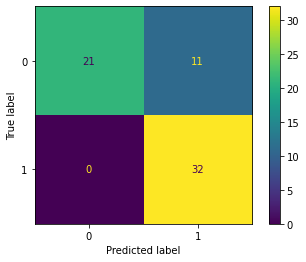



NAIVE BAYES CLASSIFIER
Accuracy: 0.828 	Precision: 0.872 	Recall: 0.828 	 F1 Score: 0.823


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


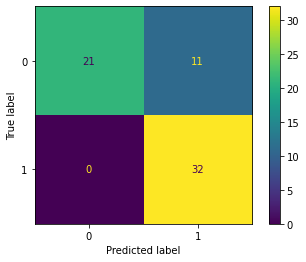



KNN CLASSIFIER
Accuracy: 0.828 	Precision: 0.872 	Recall: 0.828 	 F1 Score: 0.823


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


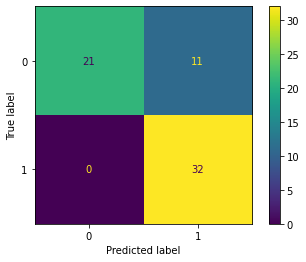



RANDOM FOREST CLASSIFIER
Accuracy: 0.828 	Precision: 0.872 	Recall: 0.828 	 F1 Score: 0.823


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


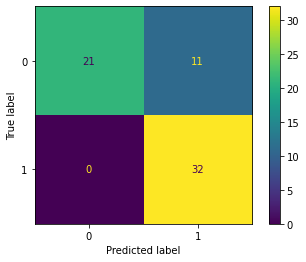



XG BOOST CLASSIFIER
Accuracy: 0.828 	Precision: 0.872 	Recall: 0.828 	 F1 Score: 0.823


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


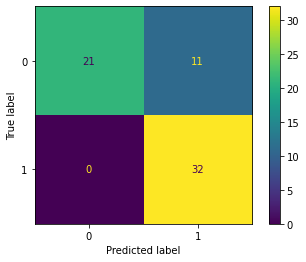



CAT BOOST CLASSIFIER
Accuracy: 0.828 	Precision: 0.872 	Recall: 0.828 	 F1 Score: 0.823


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


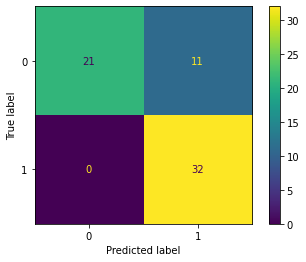

In [ ]:
clust(X_train).Kmeans(output='replace').classify_logreg()
clust(X_train).Kmeans(output='replace').classify_nb()
clust(X_train).Kmeans(output='replace').classify_knn()
clust(X_train).Kmeans(output='replace').classify_rf()
clust(X_train).Kmeans(output='replace').classify_xg()
clust(X_train).Kmeans(output='replace').classify_cat()

# ONLY CLASSIFICATIONS 



LOGISTIC REGRESSION CLASSIFIER
Accuracy: 0.969 	Precision: 0.971 	Recall: 0.969 	 F1 Score: 0.969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


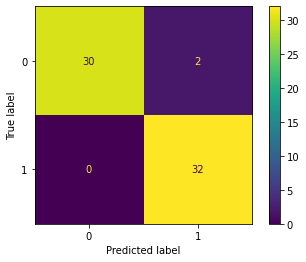



NAIVE BAYES CLASSIFIER
Accuracy: 0.906 	Precision: 0.913 	Recall: 0.906 	 F1 Score: 0.906


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


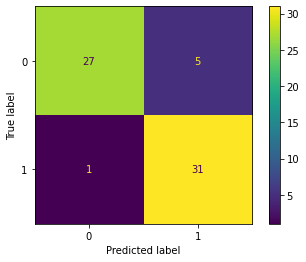



KNN CLASSIFIER
Accuracy: 0.953 	Precision: 0.954 	Recall: 0.953 	 F1 Score: 0.953


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


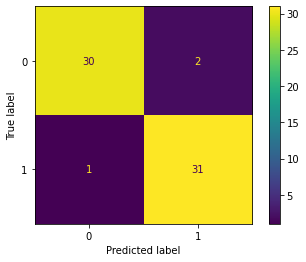



RANDOM FOREST CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


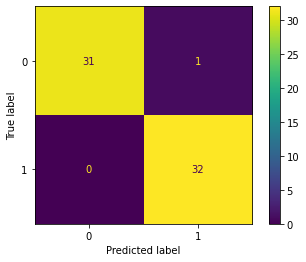



XG BOOST CLASSIFIER
Accuracy: 0.969 	Precision: 0.969 	Recall: 0.969 	 F1 Score: 0.969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


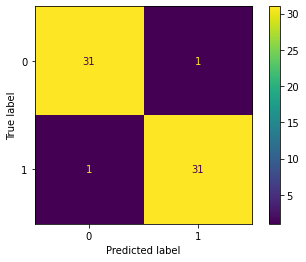



CAT BOOST CLASSIFIER
Accuracy: 0.969 	Precision: 0.969 	Recall: 0.969 	 F1 Score: 0.969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


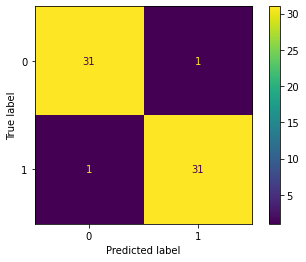

In [ ]:
clust(X_train).classify_logreg()
clust(X_train).classify_nb()
clust(X_train).classify_knn()
clust(X_train).classify_rf()
clust(X_train).classify_xg()
clust(X_train).classify_cat()

# KMEANS CLUSTERING AND THEN CLASSIFICATIONS WITH ADDING THE LABELS AS FEATURES

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



LOGISTIC REGRESSION CLASSIFIER
Accuracy: 0.969 	Precision: 0.971 	Recall: 0.969 	 F1 Score: 0.969


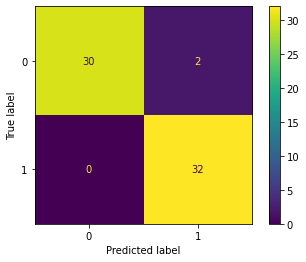

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



NAIVE BAYES CLASSIFIER
Accuracy: 0.906 	Precision: 0.913 	Recall: 0.906 	 F1 Score: 0.906


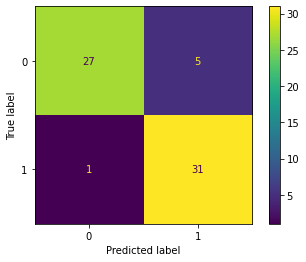

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



KNN CLASSIFIER
Accuracy: 0.953 	Precision: 0.954 	Recall: 0.953 	 F1 Score: 0.953


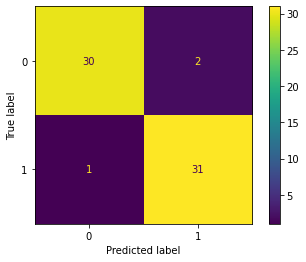

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



RANDOM FOREST CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


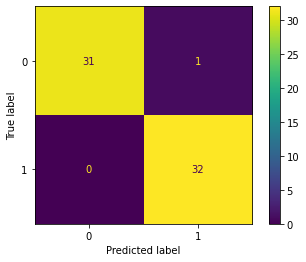



XG BOOST CLASSIFIER
Accuracy: 0.969 	Precision: 0.969 	Recall: 0.969 	 F1 Score: 0.969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


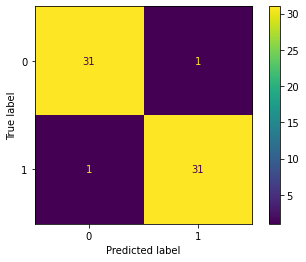



CAT BOOST CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


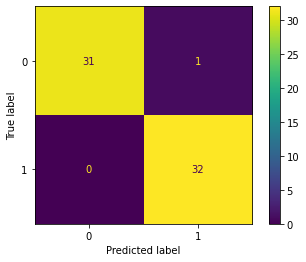

In [ ]:
clust(X_train).Kmeans(output='add').classify_logreg()
clust(X_train).Kmeans(output='add').classify_nb()
clust(X_train).Kmeans(output='add').classify_knn()
clust(X_train).Kmeans(output='add').classify_rf()
clust(X_train).Kmeans(output='add').classify_xg()
clust(X_train).Kmeans(output='add').classify_cat()

# EM CLUSTERING

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture


from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


class clust():
    def _load_data(self, sklearn_load_ds):
        data = sklearn_load_ds
        # X = pd.DataFrame(data.data)
        # X = data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(final_X_train, y_train, test_size=0.2, random_state=42)
        
        
    def __init__(self, sklearn_load_ds):
        self._load_data(sklearn_load_ds)
    
    # Logistic Regression
    def classify_logreg(self, model=LogisticRegression(random_state=42)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nLOGISTIC REGRESSION CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Naive Bayes
    def classify_nb(self, model=GaussianNB()):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nNAIVE BAYES CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # KNN 
    def classify_knn(self, model=KNeighborsClassifier(n_neighbors=5)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nKNN CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Random Forest 
    def classify_rf(self, model=RandomForestClassifier(max_depth=2, random_state=0)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nRANDOM FOREST CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # XG Boost 
    def classify_xg(self, model=XGBClassifier()):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nXG BOOST CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Cat Boost
    def classify_cat(self, model=CatBoostClassifier(verbose=0, n_estimators=100)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nCAT BOOST CLASSIFIER")
        print("Accuracy: %1.3f \tPrecision: %1.3f \tRecall: %1.3f \t F1 Score: %1.3f" % (accuracy_score(self.y_test, y_pred), precision_score(self.y_test, y_pred, average='weighted'), recall_score(self. y_test, y_pred, average='weighted'), (f1_score(self.y_test, y_pred, average='weighted'))))

        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()


    def EMClust(self, output='add'):
        # n_clusters = len(np.unique(self.y_train))
        clf = GaussianMixture(n_components=2)
        
        y_labels_train = clf.fit_predict(self.X_train)
        y_labels_test = clf.predict(self.X_test)

        # print(self.X_train['clust'])

        if output == 'add':
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == 'replace':
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output should be either add or replace')
        return self

# EM CLUSTERING AND THEN CLASSIFICATIONS WITHOUT ADDING THE LABELS AS FEATURES



LOGISTIC REGRESSION CLASSIFIER
Accuracy: 0.875 	Precision: 0.900 	Recall: 0.875 	 F1 Score: 0.873


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


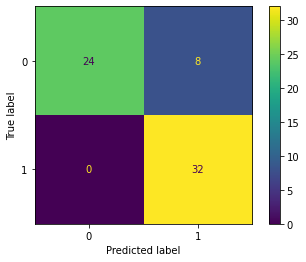



NAIVE BAYES CLASSIFIER
Accuracy: 0.875 	Precision: 0.900 	Recall: 0.875 	 F1 Score: 0.873


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


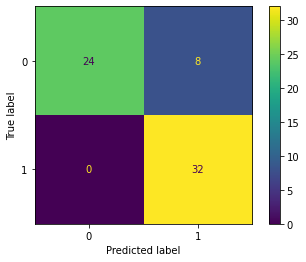



KNN CLASSIFIER
Accuracy: 0.875 	Precision: 0.900 	Recall: 0.875 	 F1 Score: 0.873


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


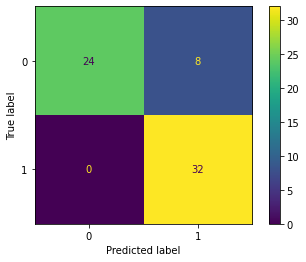



RANDOM FOREST CLASSIFIER
Accuracy: 0.875 	Precision: 0.900 	Recall: 0.875 	 F1 Score: 0.873


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


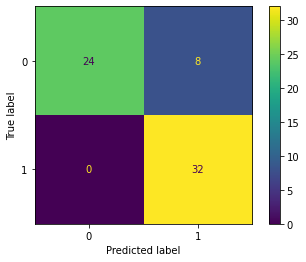



XG BOOST CLASSIFIER
Accuracy: 0.875 	Precision: 0.900 	Recall: 0.875 	 F1 Score: 0.873


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


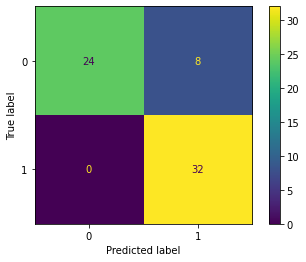



CAT BOOST CLASSIFIER
Accuracy: 0.875 	Precision: 0.900 	Recall: 0.875 	 F1 Score: 0.873


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


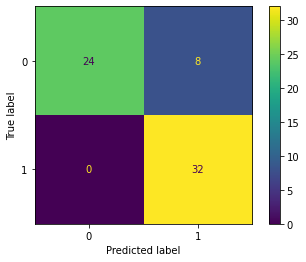

In [ ]:
clust(X_train).EMClust(output='replace').classify_logreg()
clust(X_train).EMClust(output='replace').classify_nb()
clust(X_train).EMClust(output='replace').classify_knn()
clust(X_train).EMClust(output='replace').classify_rf()
clust(X_train).EMClust(output='replace').classify_xg()
clust(X_train).EMClust(output='replace').classify_cat()

# Only Classification



LOGISTIC REGRESSION CLASSIFIER
Accuracy: 0.969 	Precision: 0.971 	Recall: 0.969 	 F1 Score: 0.969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


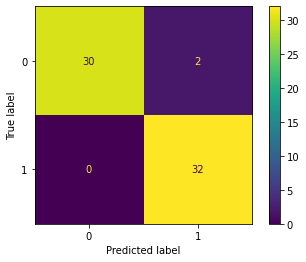



NAIVE BAYES CLASSIFIER
Accuracy: 0.906 	Precision: 0.913 	Recall: 0.906 	 F1 Score: 0.906


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


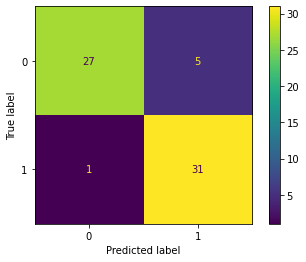



KNN CLASSIFIER
Accuracy: 0.953 	Precision: 0.954 	Recall: 0.953 	 F1 Score: 0.953


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


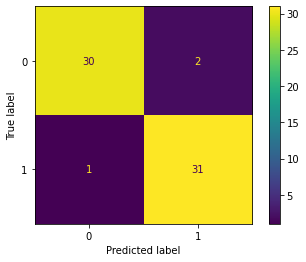



RANDOM FOREST CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


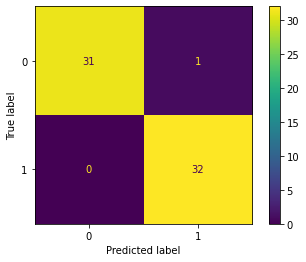



XG BOOST CLASSIFIER
Accuracy: 0.969 	Precision: 0.969 	Recall: 0.969 	 F1 Score: 0.969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


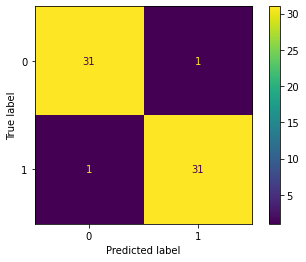



CAT BOOST CLASSIFIER
Accuracy: 0.969 	Precision: 0.969 	Recall: 0.969 	 F1 Score: 0.969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


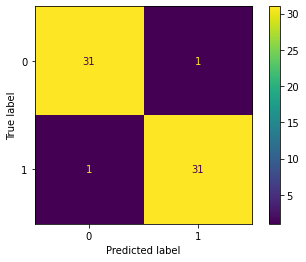

In [ ]:
clust(X_train).classify_logreg()
clust(X_train).classify_nb()
clust(X_train).classify_knn()
clust(X_train).classify_rf()
clust(X_train).classify_xg()
clust(X_train).classify_cat()

# EM CLUSTERING AND THEN CLASSIFICATIONS WITH ADDING THE LABELS AS FEATURES

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



LOGISTIC REGRESSION CLASSIFIER
Accuracy: 0.969 	Precision: 0.971 	Recall: 0.969 	 F1 Score: 0.969


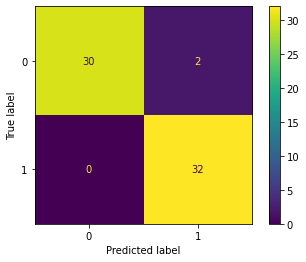

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



NAIVE BAYES CLASSIFIER
Accuracy: 0.906 	Precision: 0.913 	Recall: 0.906 	 F1 Score: 0.906


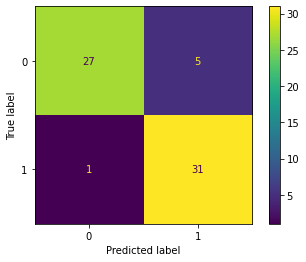

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



KNN CLASSIFIER
Accuracy: 0.953 	Precision: 0.954 	Recall: 0.953 	 F1 Score: 0.953


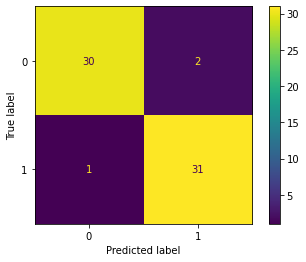

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



RANDOM FOREST CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


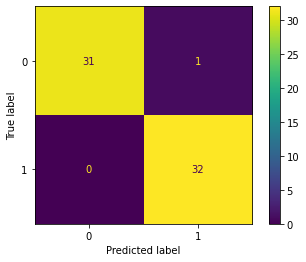



XG BOOST CLASSIFIER
Accuracy: 0.969 	Precision: 0.969 	Recall: 0.969 	 F1 Score: 0.969


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


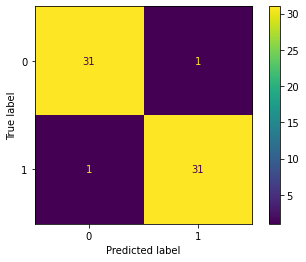



CAT BOOST CLASSIFIER
Accuracy: 0.984 	Precision: 0.985 	Recall: 0.984 	 F1 Score: 0.984


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


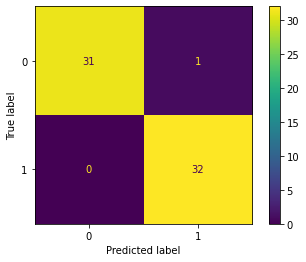

In [ ]:
clust(X_train).EMClust(output='add').classify_logreg()
clust(X_train).EMClust(output='add').classify_nb()
clust(X_train).EMClust(output='add').classify_knn()
clust(X_train).EMClust(output='add').classify_rf()
clust(X_train).EMClust(output='add').classify_xg()
clust(X_train).EMClust(output='add').classify_cat()

# DB SCAN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture


from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix


class clust():
    def _load_data(self, sklearn_load_ds):
        data = sklearn_load_ds
        # X = pd.DataFrame(data.data)
        # X = data
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(final_X_train, y_train, test_size=0.2, random_state=42)
        
        
    def __init__(self, sklearn_load_ds):
        self._load_data(sklearn_load_ds)
    
    # Logistic Regression
    def classify_logreg(self, model=LogisticRegression(random_state=42)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nLOGISTIC REGRESSION CLASSIFIER")
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))
        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Naive Bayes
    def classify_nb(self, model=GaussianNB()):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nNAIVE BAYES CLASSIFIER")
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))
        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # KNN 
    def classify_knn(self, model=KNeighborsClassifier(n_neighbors=5)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nKNN CLASSIFIER")
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))
        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Random Forest 
    def classify_rf(self, model=RandomForestClassifier(max_depth=2, random_state=0)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nRANDOM FOREST CLASSIFIER")
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))
        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # XG Boost 
    def classify_xg(self, model=XGBClassifier()):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nXG BOOST CLASSIFIER")
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))
        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()

    # Cat Boost
    def classify_cat(self, model=CatBoostClassifier(verbose=0, n_estimators=100)):
        model.fit(self.X_train, self.y_train)
        y_pred = model.predict(self.X_test)
        print("\n\nCAT BOOST CLASSIFIER")
        print('Accuracy: {}'.format(accuracy_score(self.y_test, y_pred)))
        plot_confusion_matrix(model, self.X_test, self.y_test)  
        plt.show()


    def Kmeans(self, output='add'):
        n_clusters = len(np.unique(self.y_train))
        clf = KMeans(n_clusters = n_clusters, random_state=42)
        clf.fit(self.X_train)
        y_labels_train = clf.labels_
        y_labels_test = clf.predict(self.X_test)

        # print(self.X_train['clust'])

        if output == 'add':
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == 'replace':
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output should be either add or replace')
        return self

    def DBscan(self, output='add'):
        epsilon = 0.5
        minimumSamples = 5
        db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(self.X_train)
        y_labels_train = db.labels_
        
        # print(y_labels_train)

        epsilon = 0.5
        minimumSamples = 5
        db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(self.X_test)
        y_labels_test = db.labels_
        
        # print(y_labels_test)

        if output == 'add':
            self.X_train['km_clust'] = y_labels_train
            self.X_test['km_clust'] = y_labels_test
        elif output == 'replace':
            self.X_train = y_labels_train[:, np.newaxis]
            self.X_test = y_labels_test[:, np.newaxis]
        else:
            raise ValueError('output should be either add or replace')
        return self
      
    



LOGISTIC REGRESSION CLASSIFIER
Accuracy: 0.78125


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


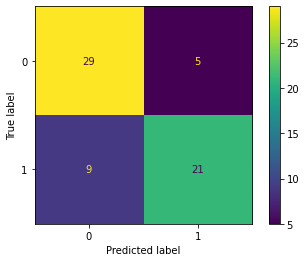



NAIVE BAYES CLASSIFIER
Accuracy: 0.78125


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


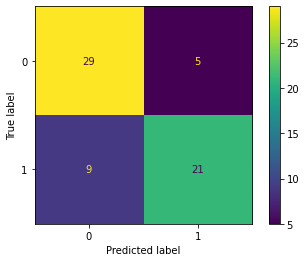



KNN CLASSIFIER
Accuracy: 0.78125


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


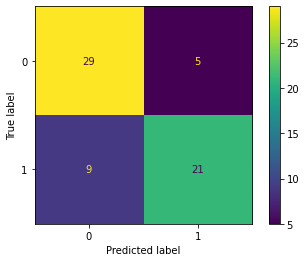



RANDOM FOREST CLASSIFIER
Accuracy: 0.78125


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


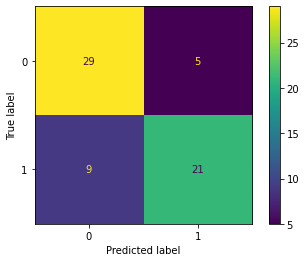



XG BOOST CLASSIFIER
Accuracy: 0.78125


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


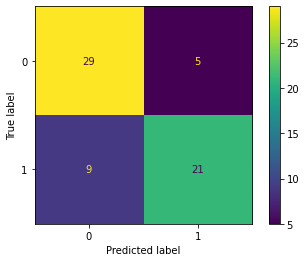



CAT BOOST CLASSIFIER
Accuracy: 0.78125


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


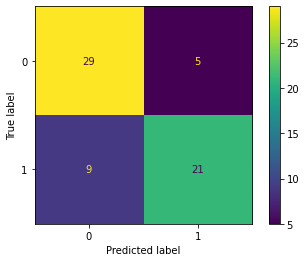

In [ ]:
clust(X_train).DBscan(output='replace').classify_logreg()
clust(X_train).DBscan(output='replace').classify_nb()
clust(X_train).DBscan(output='replace').classify_knn()
clust(X_train).DBscan(output='replace').classify_rf()
clust(X_train).DBscan(output='replace').classify_xg()
clust(X_train).DBscan(output='replace').classify_cat()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



LOGISTIC REGRESSION CLASSIFIER
Accuracy: 0.96875


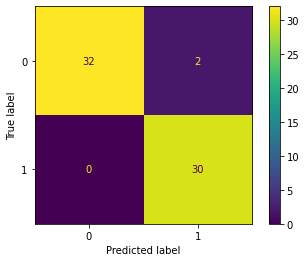

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



NAIVE BAYES CLASSIFIER
Accuracy: 0.875


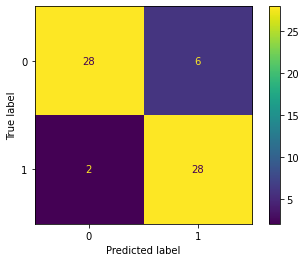

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



KNN CLASSIFIER
Accuracy: 0.984375


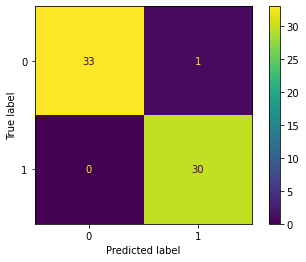

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got fea



RANDOM FOREST CLASSIFIER
Accuracy: 1.0


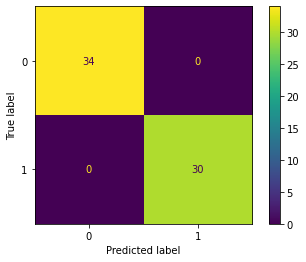



XG BOOST CLASSIFIER
Accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


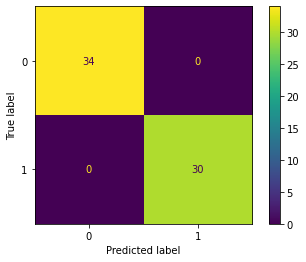



CAT BOOST CLASSIFIER
Accuracy: 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


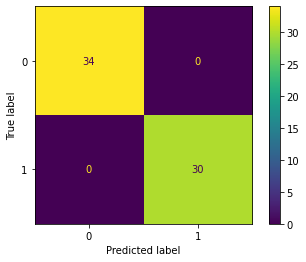

In [ ]:
clust(X_train).DBscan(output='add').classify_logreg()
clust(X_train).DBscan(output='add').classify_nb()
clust(X_train).DBscan(output='add').classify_knn()
clust(X_train).DBscan(output='add').classify_rf()
clust(X_train).DBscan(output='add').classify_xg()
clust(X_train).DBscan(output='add').classify_cat()